<a href="https://colab.research.google.com/github/DSR001915/VOIS_AICTE_Oct2025_MajorProject_DevanshSinghRaghuvanshi/blob/main/%F0%9F%8E%AC_Netflix_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of Dataset: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

Category Distribution:
 Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

Top 5 Countries:
 Country
United States     2556
India              923
Unknown            507
United Kingdom     397
Japan              226
Name: count, dtype: int64

Dataset covers years from 2008.0 to 2021.0


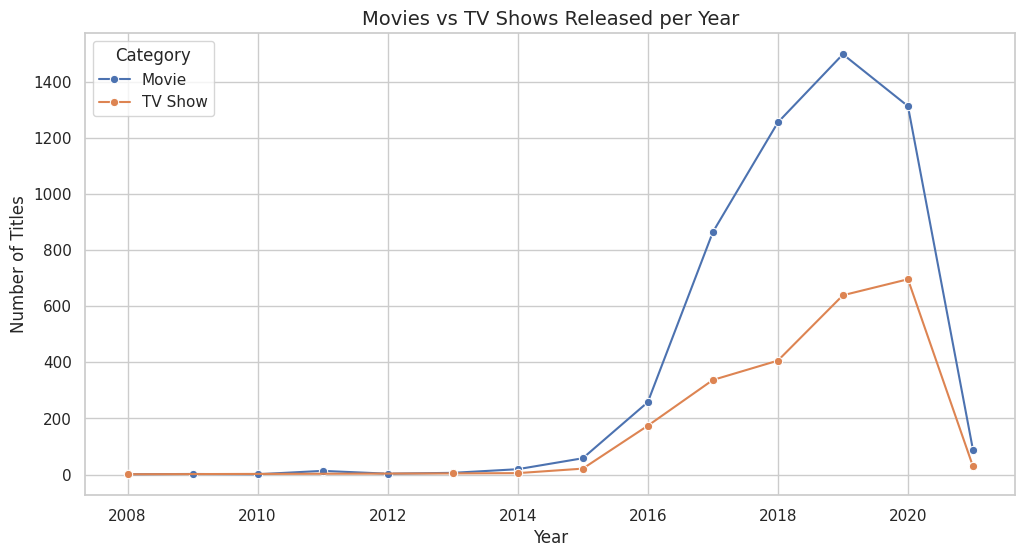

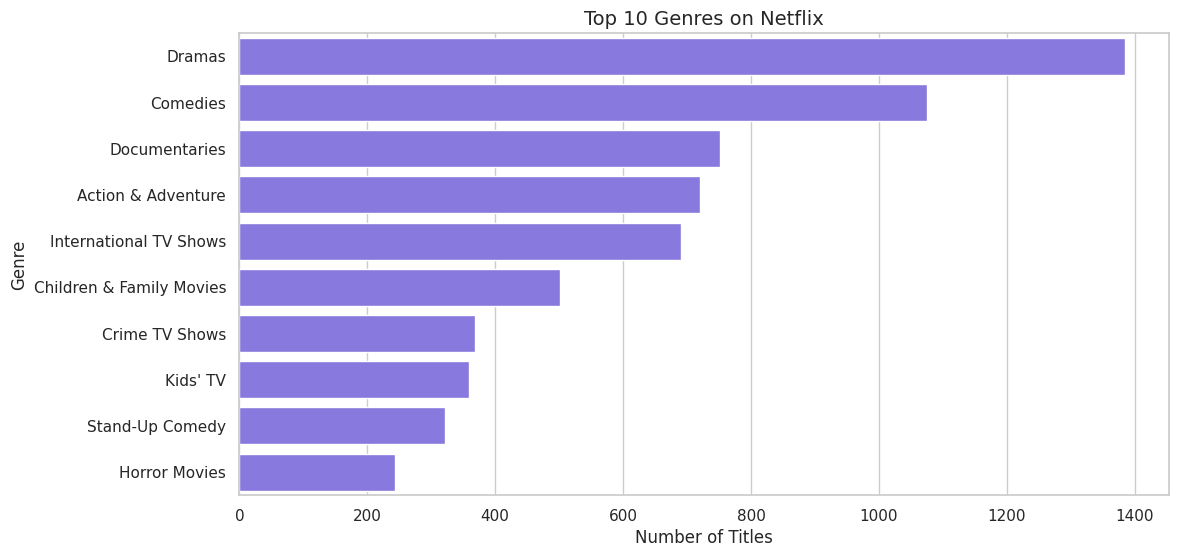

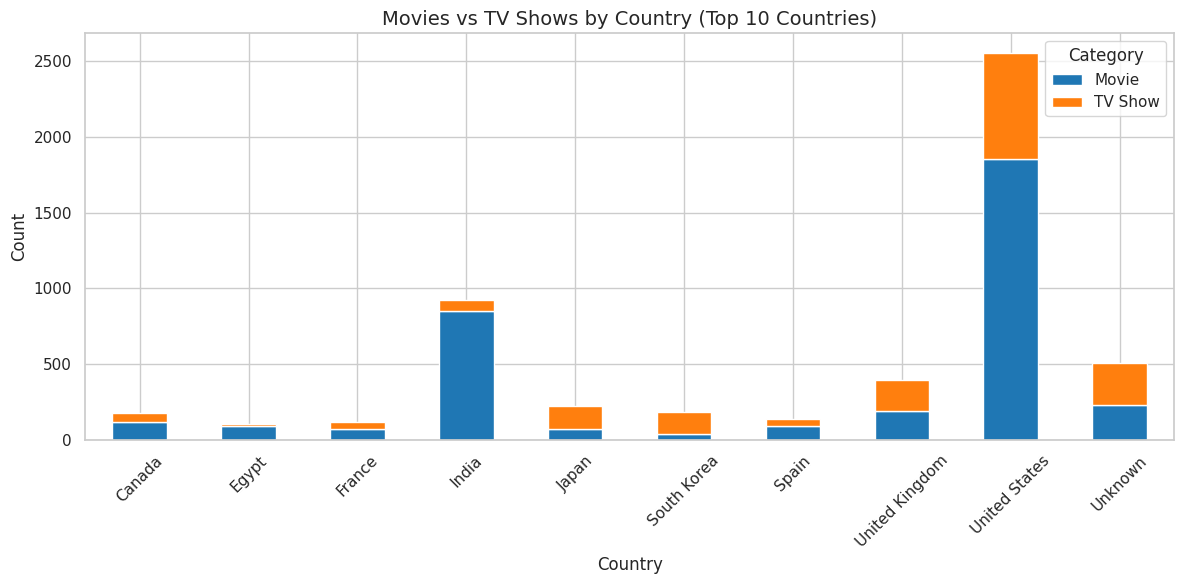

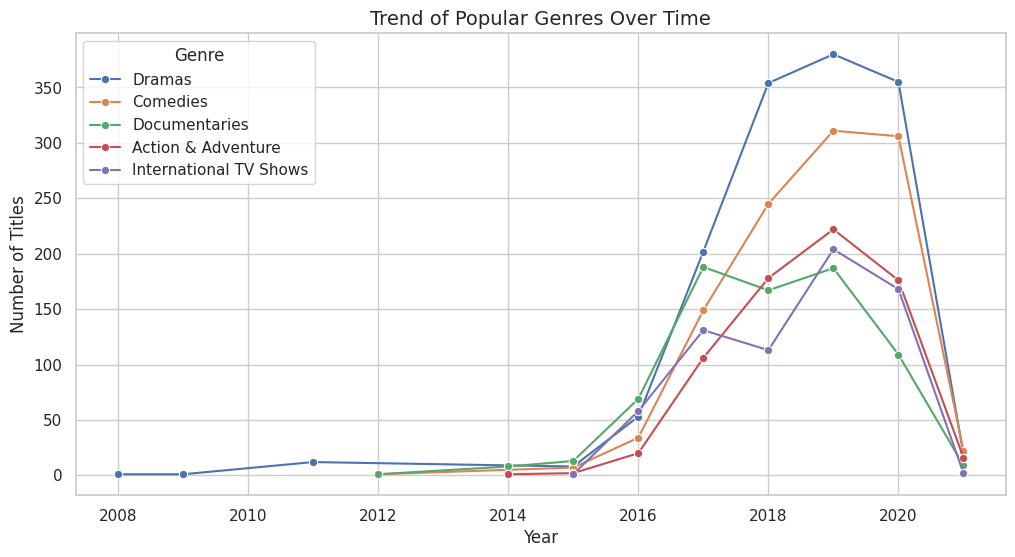


--- Strategic Insights & Recommendations ---

1. Movies continue to dominate Netflix's catalog, but TV Shows are steadily increasing, indicating growing interest in serial content.
2. Top genres like Dramas, Comedies, and Documentaries maintain strong performance — investing in hybrid genres (e.g., docu-series, comedy-drama) could attract diverse audiences.
3. The U.S. leads in content production, but rising contributions from India, U.K., and South Korea suggest global expansion opportunities.
4. Netflix should focus on strengthening regional content libraries with subtitled and dubbed options for better international reach.
5. Genre trends show a shift toward diverse storytelling — Netflix can leverage this by investing in emerging creators and genre-blending content.


In [4]:
# -------------------------------------------------------
# Netflix Dataset Analysis - Problem Statement 1
# Content Trends Analysis for Strategic Recommendations
# -------------------------------------------------------

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Setup visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

# -------------------------------------------------------
# 2. Load Dataset
# -------------------------------------------------------
df = pd.read_csv("/content/Netflix Dataset.csv")

# Quick look at dataset
print("Shape of Dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

# -------------------------------------------------------
# 3. Data Cleaning
# -------------------------------------------------------

# Standardize column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Handle Year column
if 'Release_Date' in df.columns:
    df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
    df['Year'] = df['Release_Date'].dt.year
elif 'Release_Year' in df.columns:
    df['Year'] = df['Release_Year']
else:
    df['Year'] = np.nan

# Fill missing values
for col in ['Director', 'Cast', 'Country', 'Rating']:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")

# Extract Main Genre
if 'Type' in df.columns:
    df['Main_Genre'] = df['Type'].apply(lambda x: x.split(",")[0].strip() if pd.notnull(x) else "Unknown")
elif 'Listed_in' in df.columns:
    df['Main_Genre'] = df['Listed_in'].apply(lambda x: x.split(",")[0].strip() if pd.notnull(x) else "Unknown")
else:
    df['Main_Genre'] = "Unknown"

# -------------------------------------------------------
# 4. Exploratory Data Analysis (EDA)
# -------------------------------------------------------

# Category distribution
if 'Category' not in df.columns and 'Type' in df.columns:
    df.rename(columns={'Type': 'Category'}, inplace=True)

if 'Category' in df.columns:
    print("\nCategory Distribution:\n", df['Category'].value_counts())

# Top 5 Countries
print("\nTop 5 Countries:\n", df['Country'].value_counts().head(5))

# Dataset span (years)
print("\nDataset covers years from", df['Year'].min(), "to", df['Year'].max())

# -------------------------------------------------------
# 5. Analysis & Visualizations
# -------------------------------------------------------

# 1️⃣ Movies vs TV Shows per Year
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title("Movies vs TV Shows Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Category")
plt.show()

# 2️⃣ Top 10 Genres
top_genres = df['Main_Genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, color="mediumslateblue")  # fixed warning
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

# 3️⃣ Movies vs TV Shows by Country (Top 10)
top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]
stacked = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)
stacked.plot(kind='bar', stacked=True, figsize=(12,6), color=["#1f77b4", "#ff7f0e"])
plt.title("Movies vs TV Shows by Country (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4️⃣ Choropleth Map – Country-wise Content
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
fig = px.choropleth(
    country_counts,
    locations="Country",
    locationmode="country names",
    color="Count",
    hover_name="Country",
    color_continuous_scale="viridis",
    title="Netflix Content Distribution by Country"
)
fig.show()

# 5️⃣ Growth of Popular Genres Over Time
popular_genres = df['Main_Genre'].value_counts().head(5).index
genre_trends = df[df['Main_Genre'].isin(popular_genres)].groupby(['Year','Main_Genre']).size().reset_index(name='Count')
sns.lineplot(data=genre_trends, x='Year', y='Count', hue='Main_Genre', marker="o")
plt.title("Trend of Popular Genres Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.show()

# -------------------------------------------------------
# 6. Strategic Recommendations (Based on Trends)
# -------------------------------------------------------

print("\n--- Strategic Insights & Recommendations ---\n")
print("1. Movies continue to dominate Netflix's catalog, but TV Shows are steadily increasing, indicating growing interest in serial content.")
print("2. Top genres like Dramas, Comedies, and Documentaries maintain strong performance — investing in hybrid genres (e.g., docu-series, comedy-drama) could attract diverse audiences.")
print("3. The U.S. leads in content production, but rising contributions from India, U.K., and South Korea suggest global expansion opportunities.")
print("4. Netflix should focus on strengthening regional content libraries with subtitled and dubbed options for better international reach.")
print("5. Genre trends show a shift toward diverse storytelling — Netflix can leverage this by investing in emerging creators and genre-blending content.")

